## Important Libraries

In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

## Read Data and Show it

In [2]:
data=pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data Cleansing

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.duplicated().sum()

1

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

## Data Analysis and Visualization

In [10]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
len(data.columns)

7

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_11100\3732405084.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x='charges',y=col,orient='h',palette='magma')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_11100\3732405084.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x='charges',y=col,orient='h',palette='magma')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_11100\3732405084.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x='charges',y=col,orient='h',palette='magma')
C:\Users\Mahmoud\AppData\Local\Te

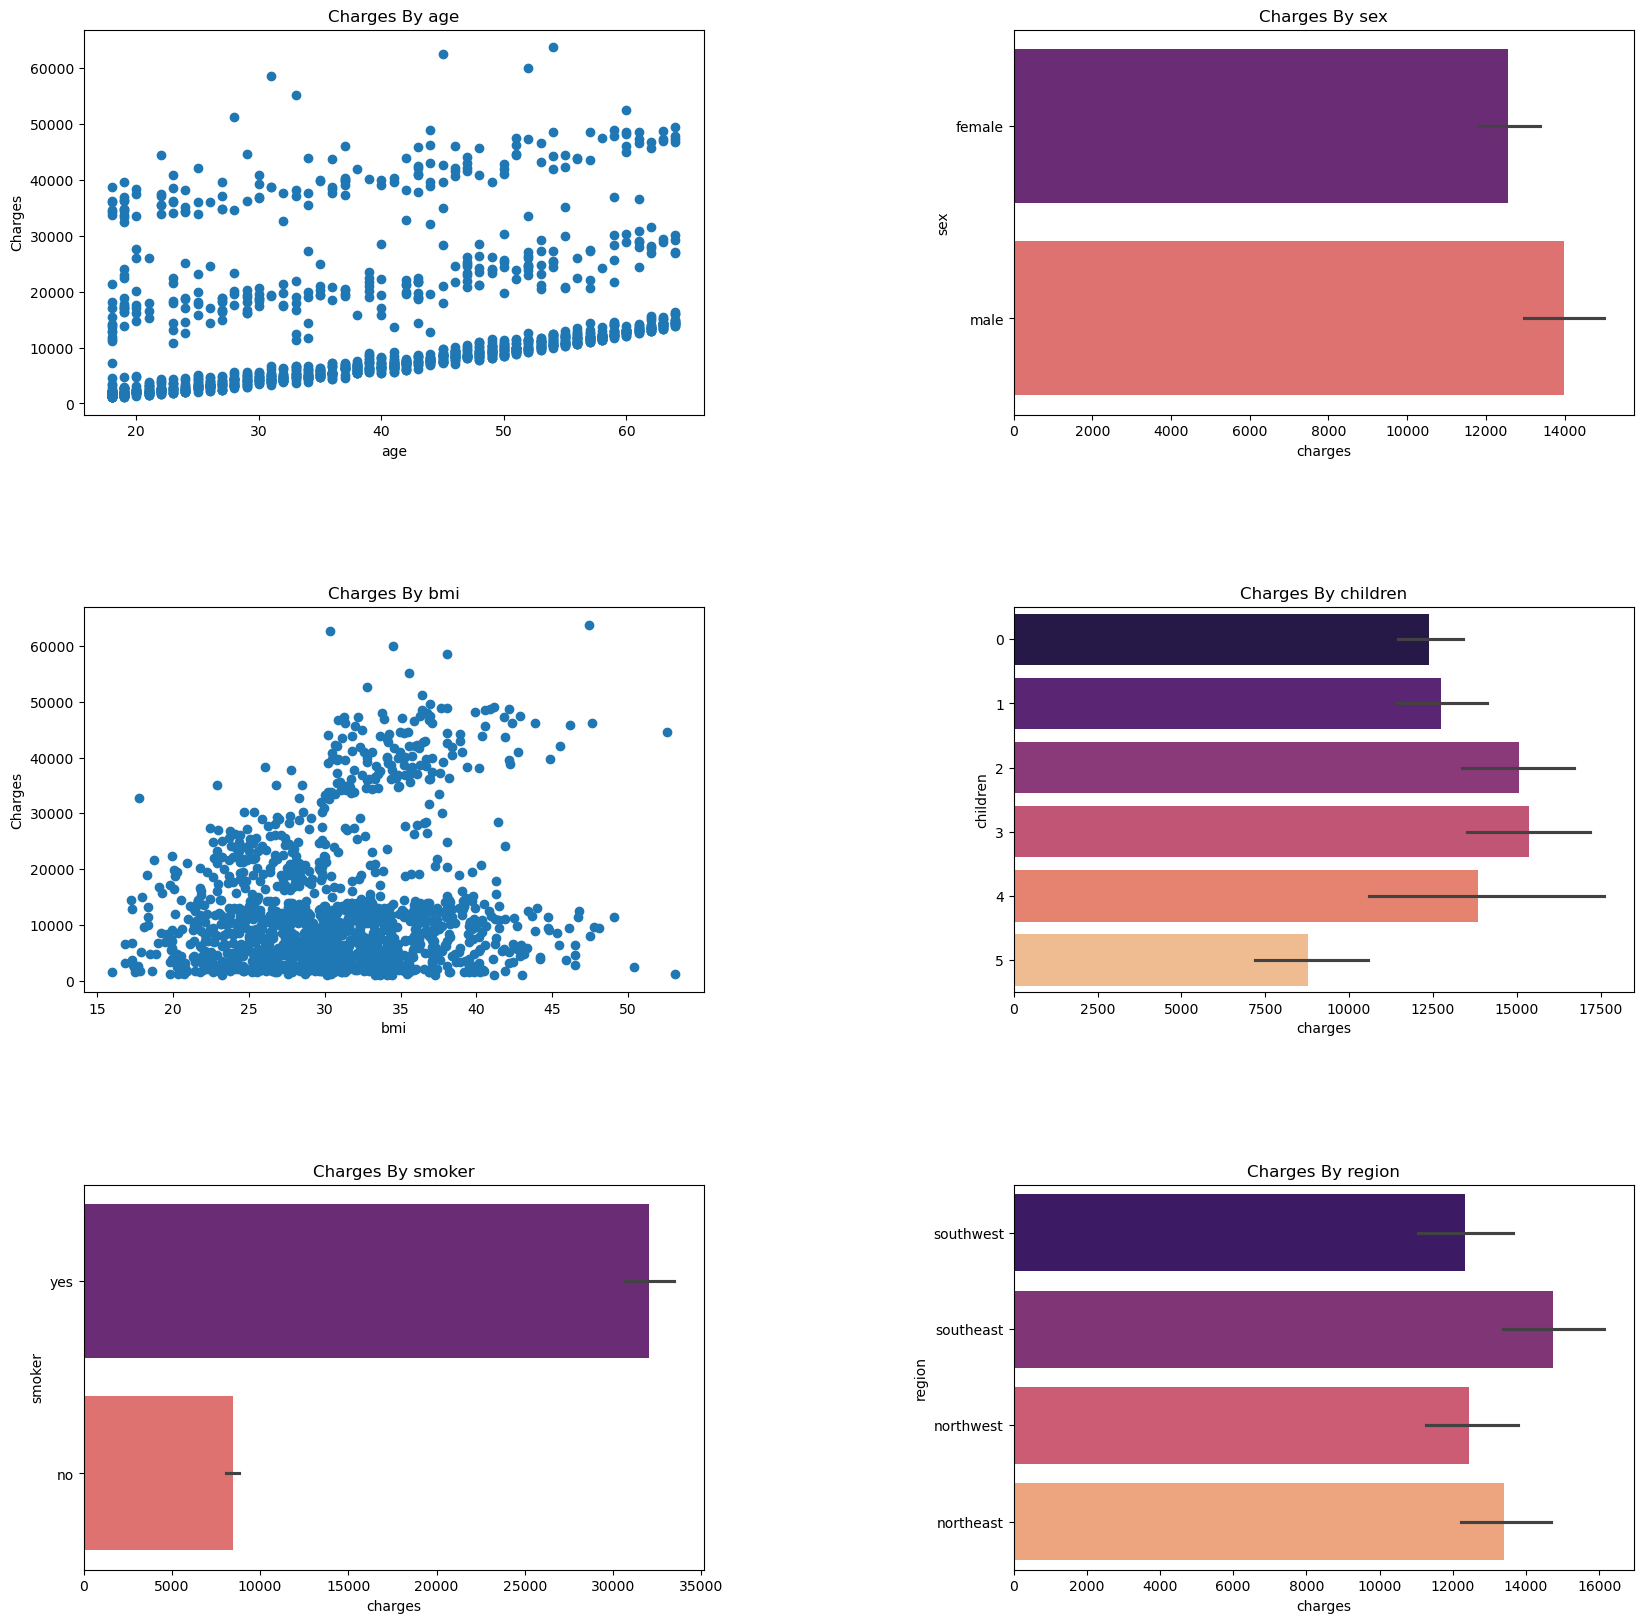

In [12]:
plt.figure(figsize=(20,20))
for col in data.columns[:-1]:
    plt.subplot(3,2,(list(data.columns).index(col))+1)
    plt.title('Charges By '+col)
    if data[col].dtype=='object':
        sns.barplot(data=data,x='charges',y=col,orient='h',palette='magma')
    elif (data[col].dtype=='int64' or data[col].dtype=='float64')and data[col].nunique()>=10:
        plt.xlabel(col)
        plt.ylabel('Charges')
        plt.scatter(data=data,x=col,y='charges')
    else:
        sns.barplot(data=data,x='charges',y=col,orient='h',palette='magma')    
plt.subplots_adjust(wspace=0.5,hspace=0.5)        
plt.show()            
    

In [13]:
gender_smoker_PT=data.pivot_table(index='sex',columns='smoker',values='charges')
gender_region_PT=data.pivot_table(index='region',columns='sex',values='charges')
smoker_region_PT=data.pivot_table(index='region',columns='smoker',values='charges')

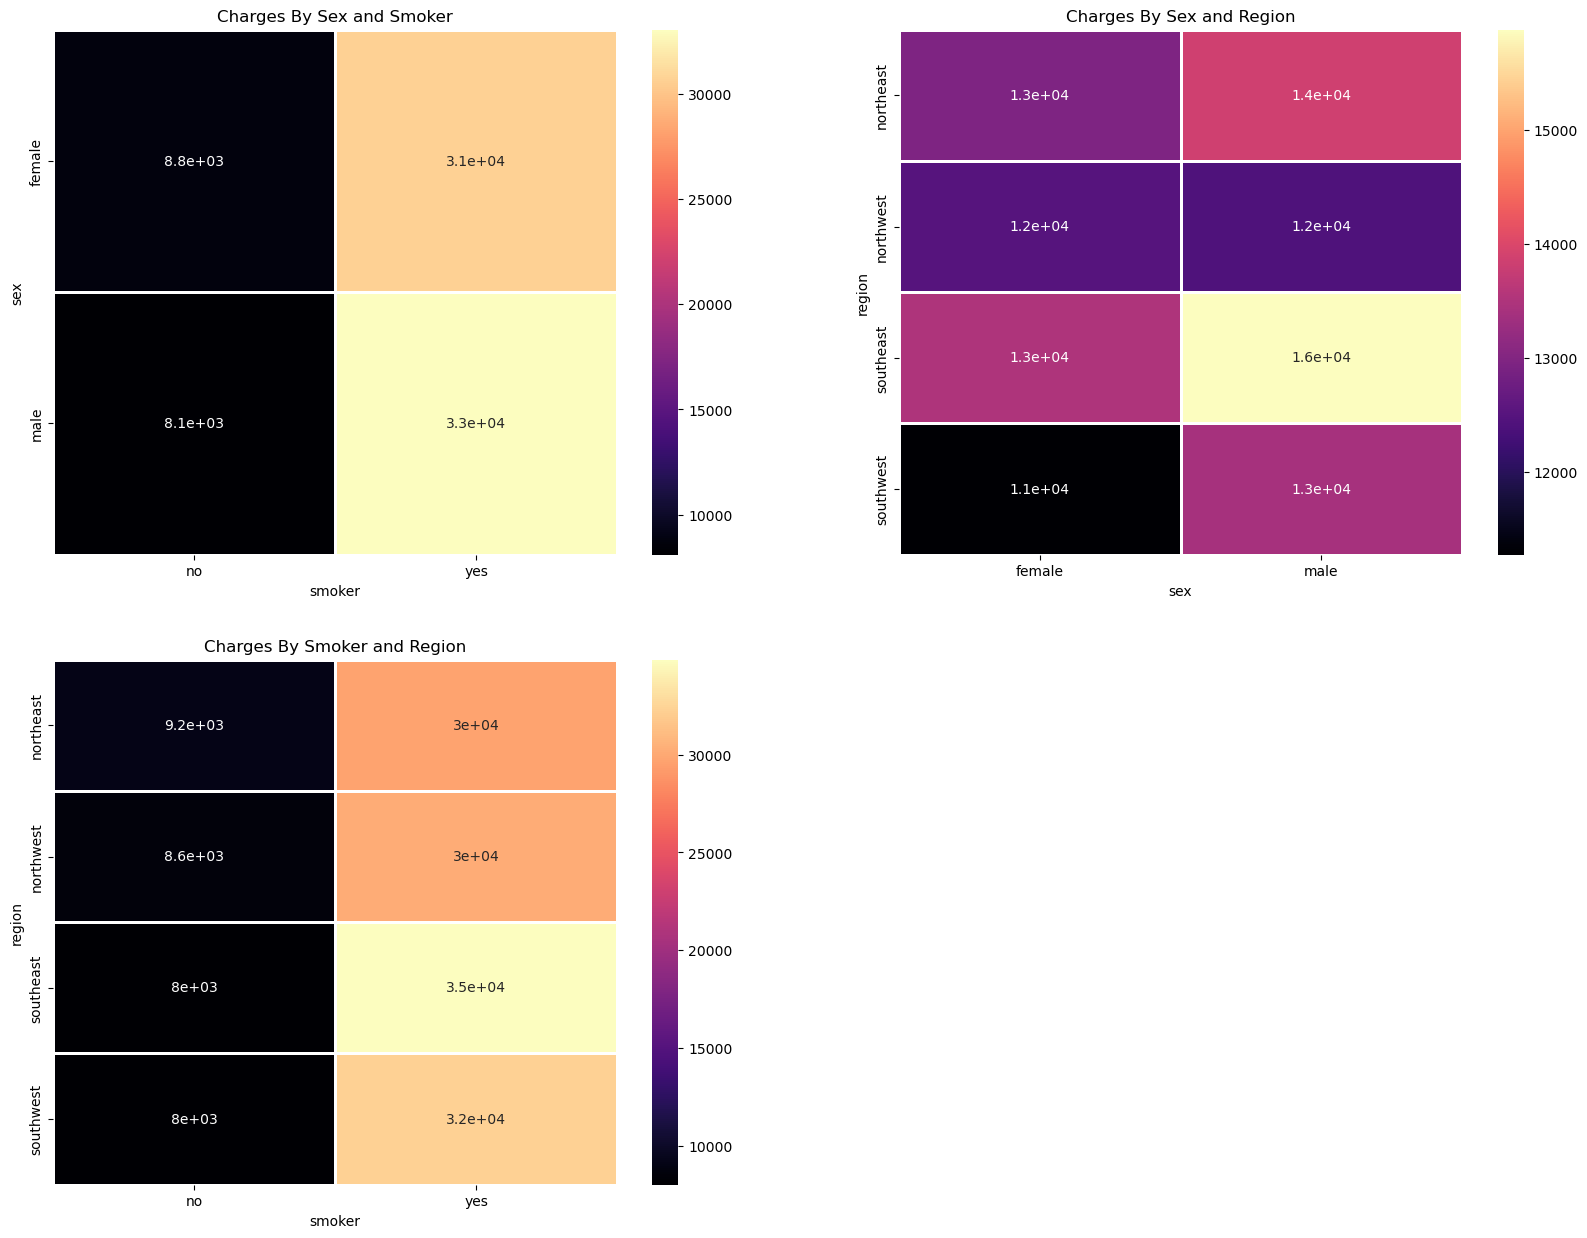

In [14]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Charges By Sex and Smoker')
sns.heatmap(gender_smoker_PT,cmap='magma',linecolor='white',linewidths=1,annot=True)
plt.subplot(2,2,2)
plt.title('Charges By Sex and Region')
sns.heatmap(gender_region_PT,cmap='magma',linecolor='white',linewidths=1,annot=True)
plt.subplot(2,2,3)
plt.title('Charges By Smoker and Region')
sns.heatmap(smoker_region_PT,cmap='magma',linecolor='white',linewidths=1,annot=True)
plt.show()

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_11100\3787644319.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('coolwarm')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_11100\3787644319.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('coolwarm')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_11100\3787644319.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('coolwarm')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_1

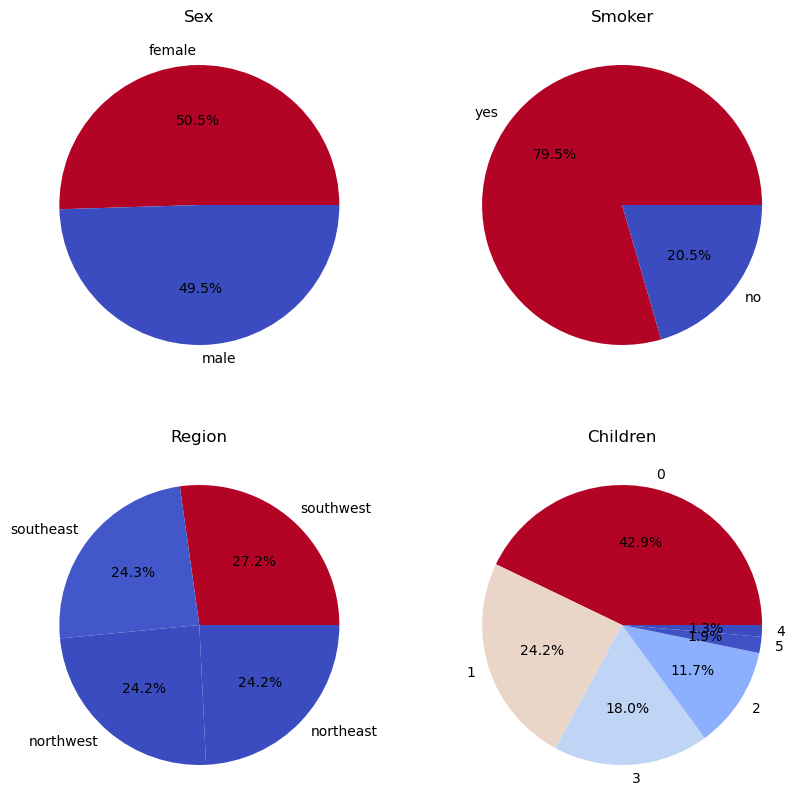

In [15]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.title('Sex')
cmap=cm.get_cmap('coolwarm')
norm=plt.Normalize(min(data['sex'].value_counts()),max(data['sex'].value_counts()))
colors=cmap(norm(data['sex'].value_counts()))
plt.pie(data['sex'].value_counts(),labels=data['sex'].unique(),colors=colors,autopct='%1.1f%%')

plt.subplot(2,2,2)
plt.title('Smoker')
cmap=cm.get_cmap('coolwarm')
norm=plt.Normalize(min(data['smoker'].value_counts()),max(data['smoker'].value_counts()))
colors=cmap(norm(data['smoker'].value_counts()))
plt.pie(data['smoker'].value_counts(),labels=data['smoker'].unique(),colors=colors,autopct='%1.1f%%')

plt.subplot(2,2,3)
plt.title('Region')
cmap=cm.get_cmap('coolwarm')
norm=plt.Normalize(min(data['region'].value_counts()),max(data['region'].value_counts()))
colors=cmap(norm(data['region'].value_counts()))
plt.pie(data['region'].value_counts(),labels=data['region'].unique(),colors=colors,autopct='%1.1f%%')

plt.subplot(2,2,4)
plt.title('Children')
cmap=cm.get_cmap('coolwarm')
norm=plt.Normalize(min(data['children'].value_counts()),max(data['children'].value_counts()))
colors=cmap(norm(data['children'].value_counts()))
plt.pie(data['children'].value_counts(),labels=data['children'].unique(),colors=colors,autopct='%1.1f%%')

plt.show()

In [21]:
# What is the average of charges ?
round(data['charges'].mean(),2)

13279.12

In [22]:
# What is the maximum value of charges ?
round(data['charges'].max(),2)

63770.43

In [23]:
# What is the minimum value of charges ?
round(data['charges'].min(),2)

1121.87

In [24]:
# What is the average of charges ?
round(data['bmi'].mean(),2)

30.66

In [26]:
# Which category of sex has the maximum value of charges ?
data[data['charges']==max(data['charges'])][['sex','charges']]

,sex,charges
543,female,63770.42801


In [27]:
# Which category of sex has the minimum value of charges ?
data[data['charges']==min(data['charges'])][['sex','charges']]

,sex,charges
940,male,1121.8739


In [28]:
# What is the information of the top 5 charges ?
data.groupby('charges').max().iloc[:-6:-1,:]

,age,sex,bmi,children,smoker,region
charges,,,,,,
63770.42801,54,female,47.410,0,yes,southeast
62592.87309,45,male,30.360,0,yes,southeast
60021.39897,52,male,34.485,3,yes,northwest
58571.07448,31,female,38.095,1,yes,northeast
55135.40209,33,female,35.530,0,yes,northwest


In [29]:
# How many children of person who has the maximum value of charges ?
data[data['charges']==max(data['charges'])][['children','charges']]

,children,charges
543,0,63770.42801


In [30]:
# How many children of person who has the minimum value of charges ?
data[data['charges']==min(data['charges'])][['children','charges']]

,children,charges
940,0,1121.8739


In [31]:
# What is the status of smoker of the person who has the maximum of charges ?
data[data['charges']==max(data['charges'])][['smoker','charges']] 

,smoker,charges
543,yes,63770.42801


In [32]:
# What is the status of smoker of the person who has the minimum of charges ?
data[data['charges']==min(data['charges'])][['smoker','charges']] 

,smoker,charges
940,no,1121.8739


In [33]:
# Which region has the maximum value of charges ?
data[data['charges']==max(data['charges'])][['region','charges']]

,region,charges
543,southeast,63770.42801


In [34]:
# Which region has the minimum value of charges ?
data[data['charges']==min(data['charges'])][['region','charges']]

,region,charges
940,southeast,1121.8739


In [35]:
# What is the average of each region?
data.loc[:,['region','charges']].groupby('region').mean()

,charges
region,
northeast,13406.384516
northwest,12450.840844
southeast,14735.411438
southwest,12346.937377


In [36]:
# What is the value of bmi of person who has the maximum value of charges ?
data[data['charges']==max(data['charges'])][['bmi','charges']]

,bmi,charges
543,47.41,63770.42801


In [37]:
# What is the value of bmi of person who has the minimum value of charges ?
data[data['charges']==min(data['charges'])][['bmi','charges']]

,bmi,charges
940,23.21,1121.8739


## Data Preprocessing

In [38]:
def convert_obj_num(data):
    lbls={}
    for col in data.columns:
        if data[col].dtype=='object':
            lbl=LabelEncoder()
            data[col]=lbl.fit_transform(data[col])
            lbls[col]=lbl
    return data ,lbls       

In [39]:
data,lbls=convert_obj_num(data)

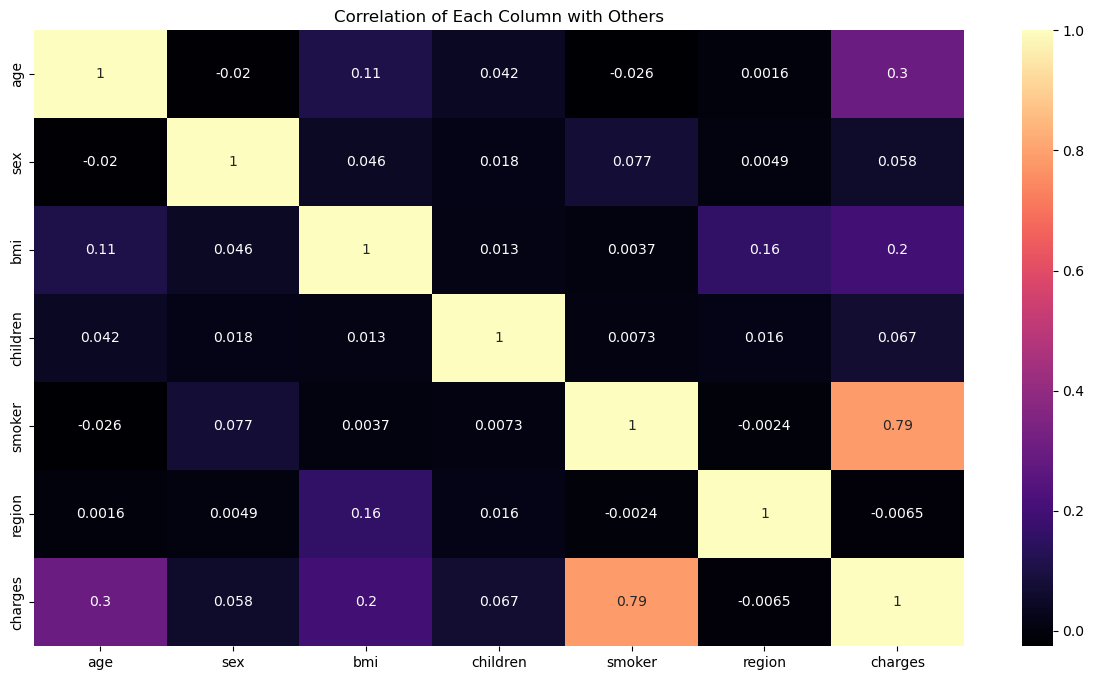

In [40]:
plt.figure(figsize=(15,8))
plt.title('Correlation of Each Column with Others')
sns.heatmap(data.corr(),cmap='magma',annot=True)
plt.show()

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_11100\1260100399.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=col,orient='h',palette='magma')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_11100\1260100399.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=col,orient='h',palette='magma')


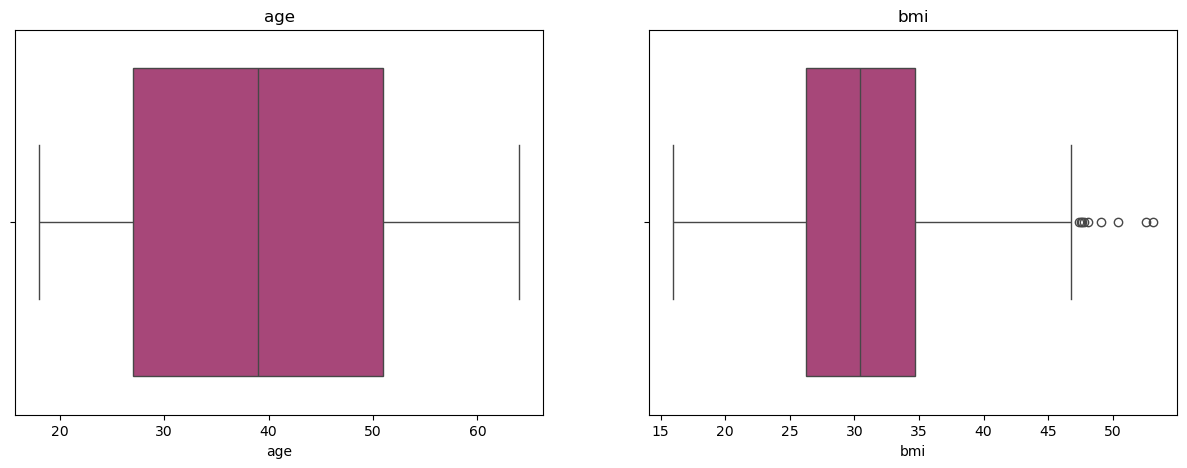

In [41]:
num_cols=['age','bmi']
plt.figure(figsize=(15,5))
for col in num_cols:
    plt.subplot(1,2,(num_cols.index(col))+1)
    plt.title(col)
    sns.boxplot(data=data,x=col,orient='h',palette='magma')
plt.show()    

In [42]:
for col in num_cols:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_fence=Q1-(IQR*1.5)
    upper_fence=Q3+(IQR*1.5)
    lower_outliers=data[data[col]<lower_fence][col].values
    upper_outliers=data[data[col]>upper_fence][col].values
    data[col].replace(lower_outliers,lower_fence,inplace=True)
    data[col].replace(upper_outliers,upper_fence,inplace=True)

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_11100\4149023193.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace(lower_outliers,lower_fence,inplace=True)
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_11100\4149023193.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_11100\3345185764.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=col,orient='h',palette='magma')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_11100\3345185764.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=col,orient='h',palette='magma')


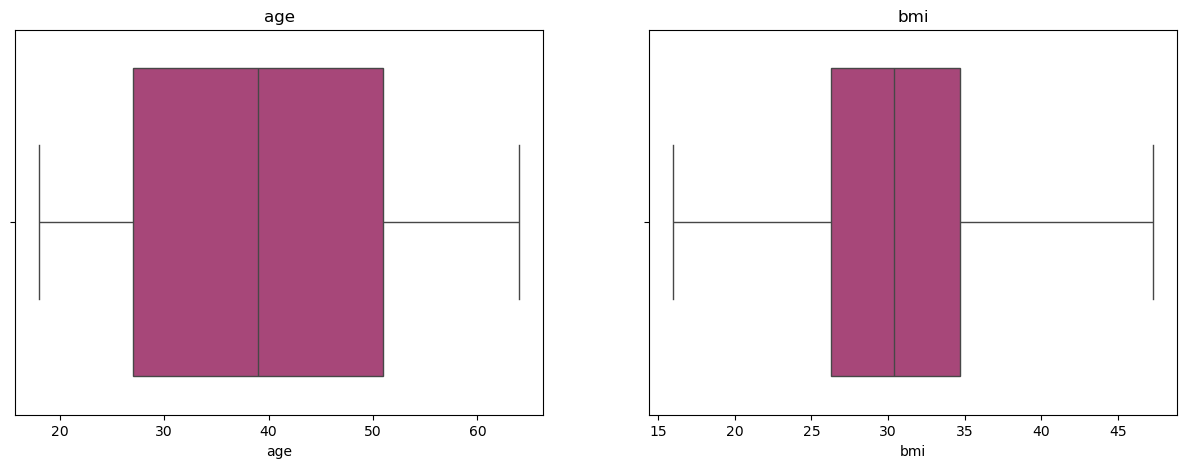

In [43]:
plt.figure(figsize=(15,5))
for col in num_cols:
    plt.subplot(1,2,(num_cols.index(col))+1)
    plt.title(col)
    sns.boxplot(data=data,x=col,orient='h',palette='magma')
plt.show()    

## Data Splitting

In [44]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [45]:
def norm_data(data):
    scalers={}
    for col in data.columns:
        scaler=MinMaxScaler()
        data[col]=scaler.fit_transform(X[col].values.reshape(-1,1))
        scalers[col]=scaler
    return data,scalers

In [46]:
X,scalers=norm_data(X)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

## Data Modeling and Evaluation

Linear Regression Model

In [48]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [49]:
predict_train=LR.predict(x_train)
predict_test=LR.predict(x_test)

In [50]:
acc_train=r2_score(y_train,predict_train)
acc_test=r2_score(y_test,predict_test)

In [51]:
print("Training Accuracy : ",round(acc_train*100,2),'%')
print("Testing Accuracy  : ",round(acc_test*100,2),'%')

Training Accuracy :  72.98 %
Testing Accuracy  :  80.7 %


In [52]:
print("Mean Squared Error             : ",round(mean_squared_error(y_test,predict_test),2))
print("Mean Absolute Error            : ",round(mean_absolute_error(y_test,predict_test),2))
print("Mean Absolute Percentage Error : ",round(mean_absolute_percentage_error(y_test,predict_test)*100,2),'%')

Mean Squared Error             :  35467636.64
Mean Absolute Error            :  4187.34
Mean Absolute Percentage Error :  42.04 %


In [53]:
pca=PCA(n_components=1)
x_train_component=pca.fit_transform(x_train)
x_test_component=pca.fit_transform(x_test)

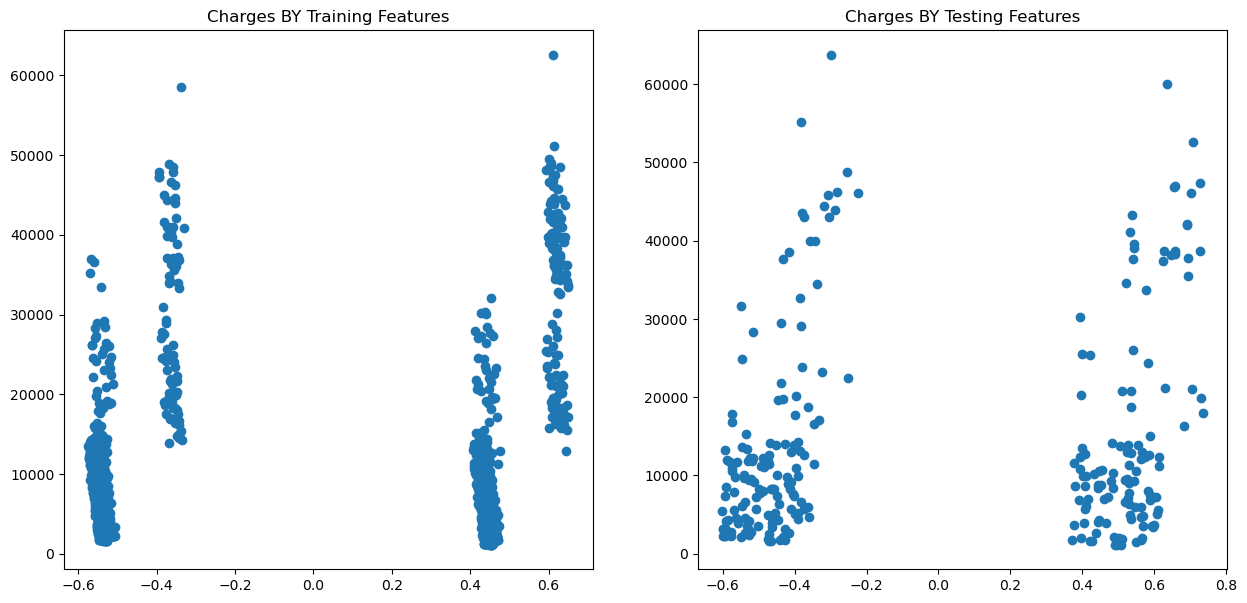

In [54]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Charges BY Training Features")
plt.scatter(x_train_component,y_train)
plt.subplot(1,2,2)
plt.title("Charges BY Testing Features")
plt.scatter(x_test_component,y_test)
plt.show()

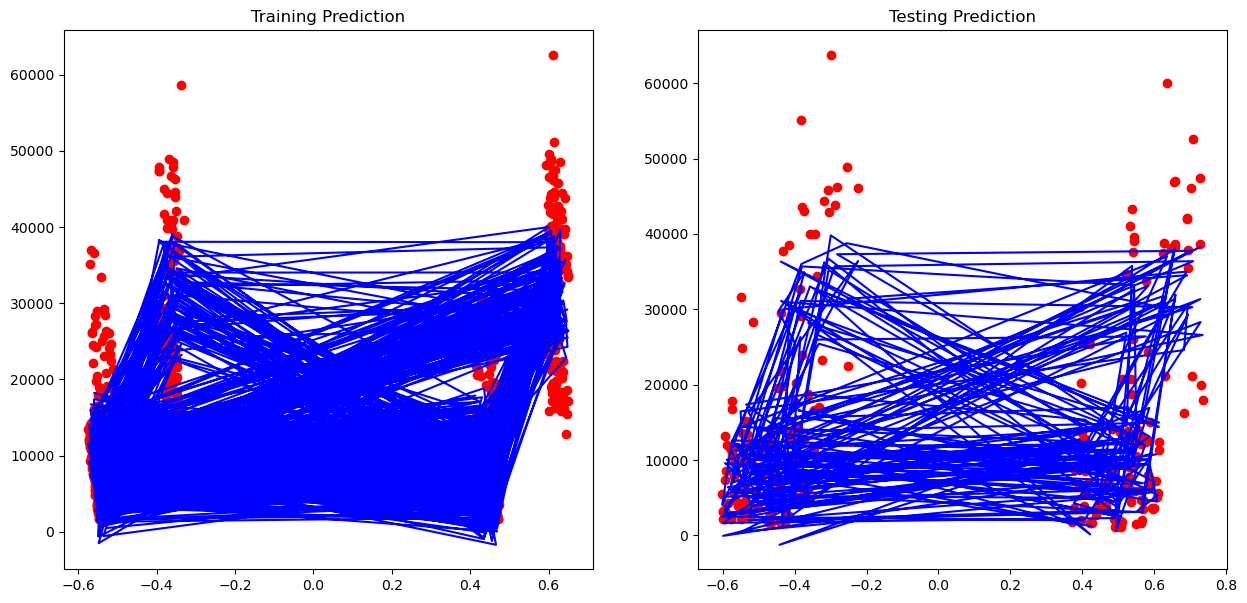

In [55]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Training Prediction')
plt.scatter(x_train_component,y_train,color='red')
plt.plot(x_train_component,predict_train,color='blue')
plt.subplot(1,2,2)
plt.title('Testing Prediction')
plt.scatter(x_test_component,y_test,color='red')
plt.plot(x_test_component,predict_test,color='blue')
plt.show()

Applying Cross Validation on Linear Regression Model

In [56]:
k=KFold(n_splits=5)
scores=cross_val_score(estimator=LR,X=X,y=Y,cv=k)
print("scores            :",scores)
print("average of scores :",scores.mean())

scores            : [0.76139442 0.7085549  0.77715321 0.73311081 0.75595166]
average of scores : 0.7472330007362453


Applying Polynomial on Linear Regression Model

In [57]:
poly=PolynomialFeatures(degree=3)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)
poly_LR=LinearRegression()
poly_LR.fit(x_train_poly,y_train)

LinearRegression()

In [58]:
predict_train2=poly_LR.predict(x_train_poly)
predict_test2=poly_LR.predict(x_test_poly)

In [59]:
acc_train2=r2_score(y_train,predict_train2)
acc_test2=r2_score(y_test,predict_test2)

In [60]:
print("Training Accuracy : ",round(acc_train2*100,2),'%')
print("Testing Accuracy  : ",round(acc_test2*100,2),'%')

Training Accuracy :  84.3 %
Testing Accuracy  :  87.74 %


In [61]:
print("Mean Squared Error             : ",round(mean_squared_error(y_test,predict_test2),2))
print("Mean Absolute Error            : ",round(mean_absolute_error(y_test,predict_test2),2))
print("Mean Absolute Percentage Error : ",round(mean_absolute_percentage_error(y_test,predict_test2)*100,2),'%')

Mean Squared Error             :  22531533.58
Mean Absolute Error            :  3011.39
Mean Absolute Percentage Error :  35.33 %


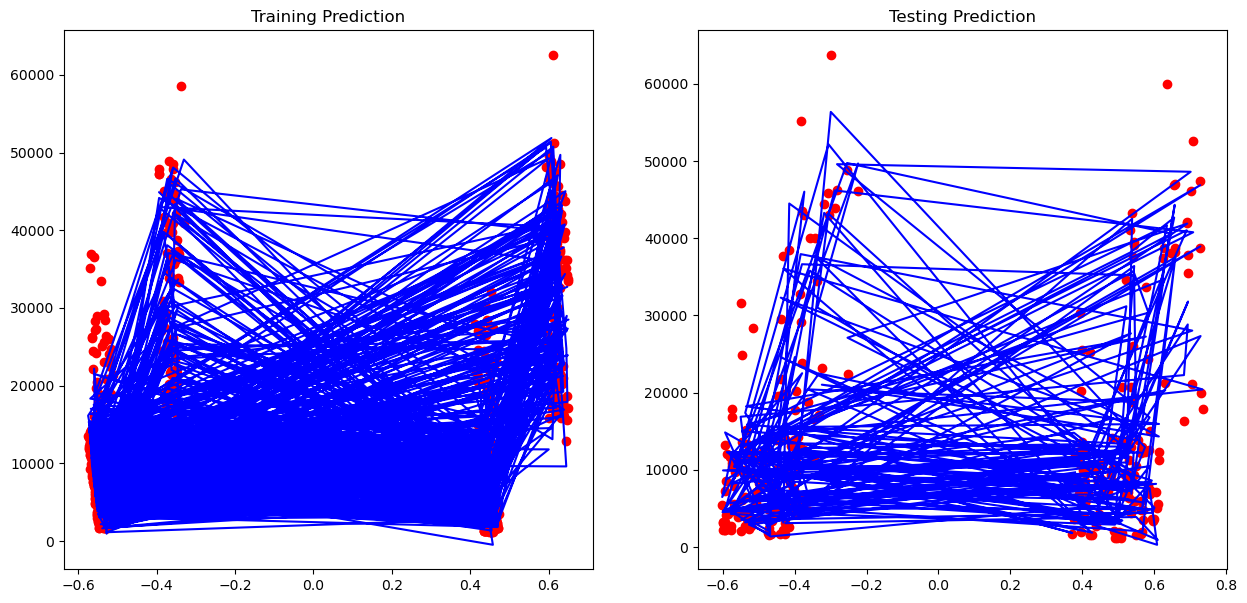

In [62]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Training Prediction')
plt.scatter(x_train_component,y_train,color='red')
plt.plot(x_train_component,predict_train2,color='blue')
plt.subplot(1,2,2)
plt.title('Testing Prediction')
plt.scatter(x_test_component,y_test,color='red')
plt.plot(x_test_component,predict_test2,color='blue')
plt.show()

Decision Tree Model

In [63]:
DT=DecisionTreeRegressor(criterion='squared_error',max_depth=6,random_state=42)
DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [64]:
predict_train3=DT.predict(x_train)
predict_test3=DT.predict(x_test)

In [65]:
acc_train3=r2_score(y_train,predict_train3)
acc_test3=r2_score(y_test,predict_test3)

In [66]:
print("Training Accuracy : ",round(acc_train3*100,2),'%')
print("Testing Accuracy  : ",round(acc_test3*100,2),'%')

Training Accuracy :  88.7 %
Testing Accuracy  :  86.94 %


In [67]:
print("Mean Squared Error             : ",round(mean_squared_error(y_test,predict_test3),2))
print("Mean Absolute Error            : ",round(mean_absolute_error(y_test,predict_test3),2))
print("Mean Absolute Percentage Error : ",round(mean_absolute_percentage_error(y_test,predict_test3)*100,2),'%')

Mean Squared Error             :  24006653.59
Mean Absolute Error            :  2755.72
Mean Absolute Percentage Error :  38.91 %


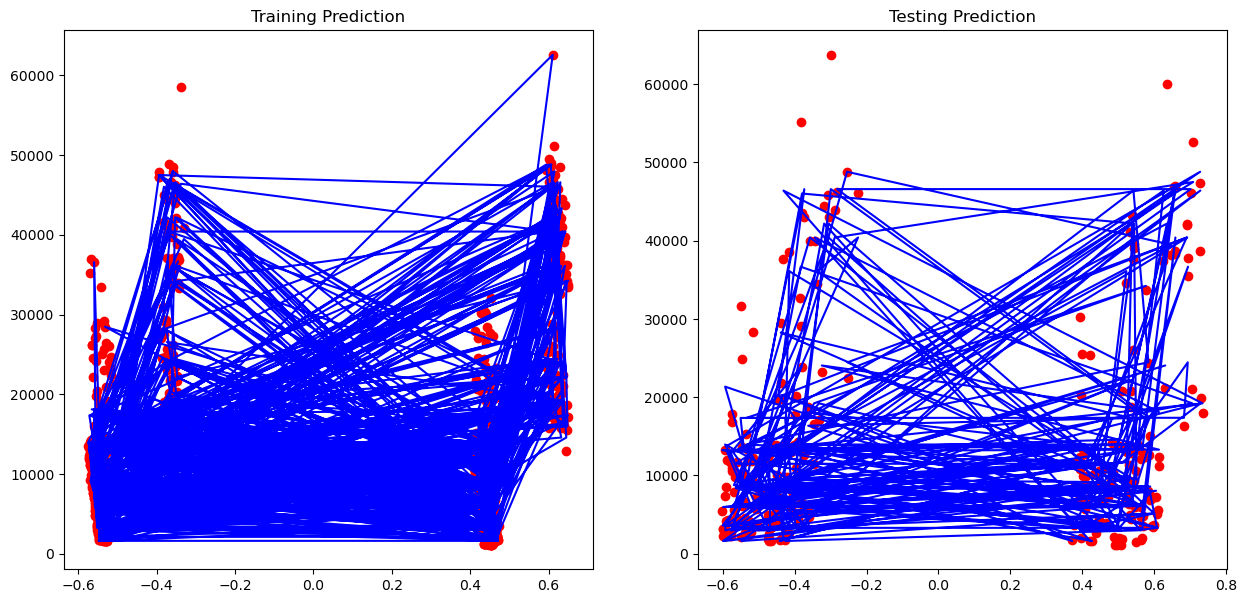

In [68]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Training Prediction')
plt.scatter(x_train_component,y_train,color='red')
plt.plot(x_train_component,predict_train3,color='blue')
plt.subplot(1,2,2)
plt.title('Testing Prediction')
plt.scatter(x_test_component,y_test,color='red')
plt.plot(x_test_component,predict_test3,color='blue')
plt.show()

Random Forest Model

In [69]:
RF=RandomForestRegressor(n_estimators=50,criterion='squared_error',max_depth=7,random_state=42)
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, n_estimators=50, random_state=42)

In [70]:
predict_train4=RF.predict(x_train)
predict_test4=RF.predict(x_test)

In [71]:
acc_train4=r2_score(y_train,predict_train4)
acc_test4=r2_score(y_test,predict_test4)

In [72]:
print("Training Accuracy : ",round(acc_train4*100,2),'%')
print("Testing Accuracy  : ",round(acc_test4*100,2),'%')

Training Accuracy :  92.02 %
Testing Accuracy  :  89.47 %


In [73]:
print("Mean Squared Error             : ",round(mean_squared_error(y_test,predict_test4),2))
print("Mean Absolute Error            : ",round(mean_absolute_error(y_test,predict_test4),2))
print("Mean Absolute Percentage Error : ",round(mean_absolute_percentage_error(y_test,predict_test4)*100,2),'%')

Mean Squared Error             :  19344097.07
Mean Absolute Error            :  2428.26
Mean Absolute Percentage Error :  31.35 %


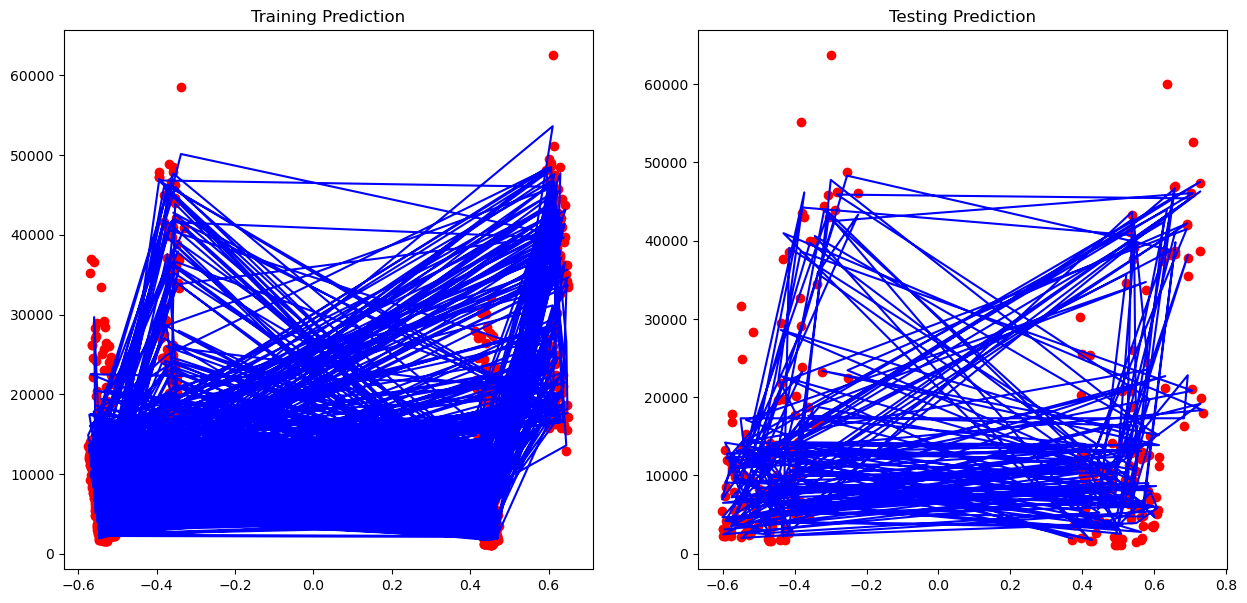

In [74]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Training Prediction')
plt.scatter(x_train_component,y_train,color='red')
plt.plot(x_train_component,predict_train4,color='blue')
plt.subplot(1,2,2)
plt.title('Testing Prediction')
plt.scatter(x_test_component,y_test,color='red')
plt.plot(x_test_component,predict_test4,color='blue')
plt.show()

Boosting Model

In [75]:
boost=AdaBoostRegressor(n_estimators=5,estimator=LR,learning_rate=0.01,random_state=42)
boost.fit(x_train,y_train)

AdaBoostRegressor(estimator=LinearRegression(), learning_rate=0.01,
                  n_estimators=5, random_state=42)

In [76]:
predict_train5=boost.predict(x_train)
predict_test5=boost.predict(x_test)

In [77]:
acc_train5=r2_score(y_train,predict_train5)
acc_test5=r2_score(y_test,predict_test5)

In [78]:
print("Training Accuracy : ",round(acc_train5*100,2),'%')
print("Testing Accuracy  : ",round(acc_test5*100,2),'%')

Training Accuracy :  73.34 %
Testing Accuracy  :  80.89 %


In [79]:
print("Mean Squared Error             : ",round(mean_squared_error(y_test,predict_test5),2))
print("Mean Absolute Error            : ",round(mean_absolute_error(y_test,predict_test5),2))
print("Mean Absolute Percentage Error : ",round(mean_absolute_percentage_error(y_test,predict_test5)*100,2),'%')

Mean Squared Error             :  35115330.0
Mean Absolute Error            :  4159.11
Mean Absolute Percentage Error :  40.33 %


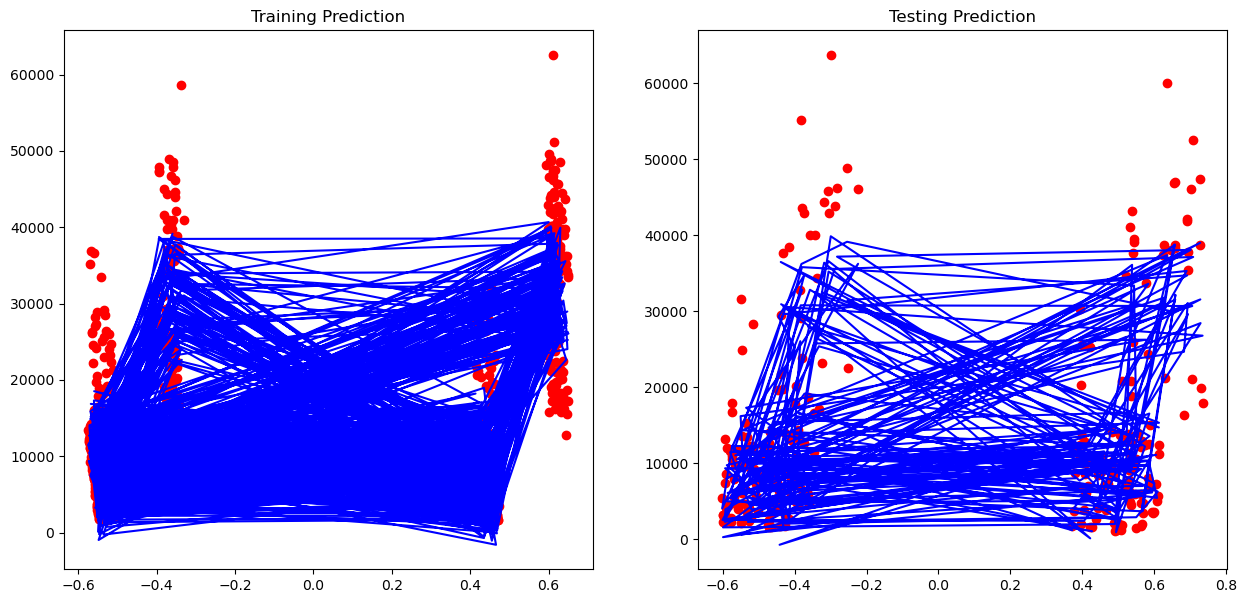

In [80]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Training Prediction')
plt.scatter(x_train_component,y_train,color='red')
plt.plot(x_train_component,predict_train5,color='blue')
plt.subplot(1,2,2)
plt.title('Testing Prediction')
plt.scatter(x_test_component,y_test,color='red')
plt.plot(x_test_component,predict_test5,color='blue')
plt.show()

Bagging Model

In [81]:
bagging=BaggingRegressor(n_estimators=10,estimator=LR,random_state=42)
bagging.fit(x_train,y_train)

BaggingRegressor(estimator=LinearRegression(), random_state=42)

In [82]:
predict_train6=bagging.predict(x_train)
predict_test6=bagging.predict(x_test)

In [83]:
acc_train6=r2_score(y_train,predict_train6)
acc_test6=r2_score(y_test,predict_test6)

In [84]:
print("Training Accuracy : ",round(acc_train6*100,2),'%')
print("Testing Accuracy  : ",round(acc_test6*100,2),'%')

Training Accuracy :  72.97 %
Testing Accuracy  :  80.52 %


In [85]:
print("Mean Squared Error             : ",round(mean_squared_error(y_test,predict_test6),2))
print("Mean Absolute Error            : ",round(mean_absolute_error(y_test,predict_test6),2))
print("Mean Absolute Percentage Error : ",round(mean_absolute_percentage_error(y_test,predict_test6)*100,2),'%')

Mean Squared Error             :  35802965.7
Mean Absolute Error            :  4211.03
Mean Absolute Percentage Error :  42.5 %


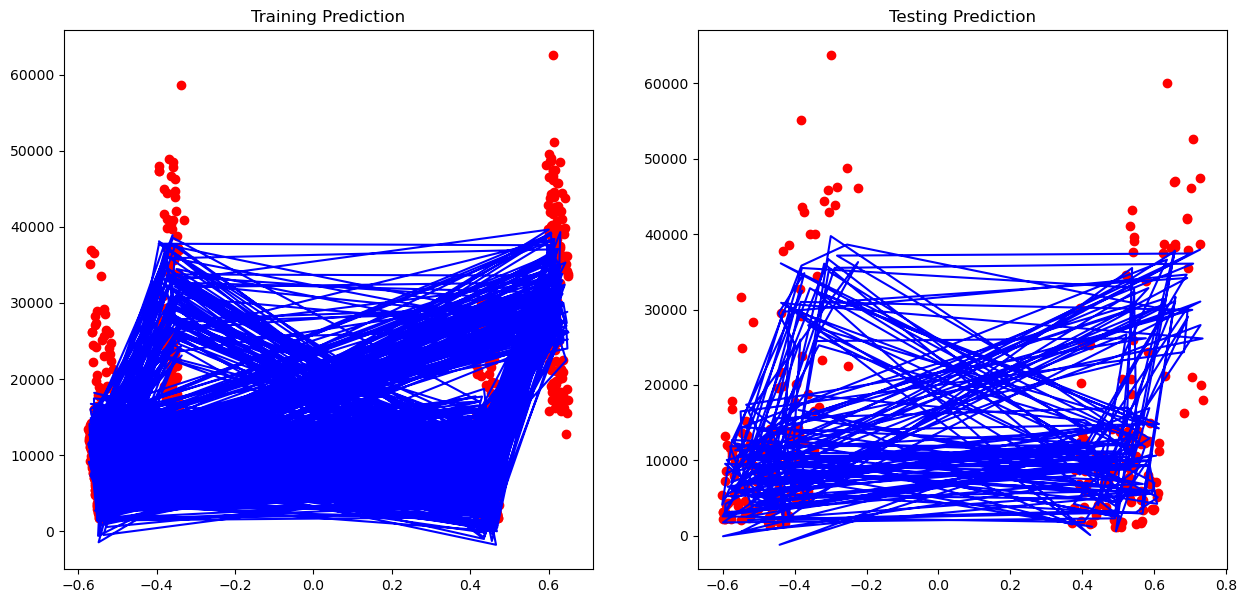

In [86]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Training Prediction')
plt.scatter(x_train_component,y_train,color='red')
plt.plot(x_train_component,predict_train6,color='blue')
plt.subplot(1,2,2)
plt.title('Testing Prediction')
plt.scatter(x_test_component,y_test,color='red')
plt.plot(x_test_component,predict_test6,color='blue')
plt.show()

## Save Models

In [268]:
pickle.dump(LR,open(r'models\LR_model.pkl','wb'))
pickle.dump(poly_LR,open(r'models\Poly_LR_model.pkl','wb'))
pickle.dump(DT,open(r'models\DTR_model.pkl','wb'))
pickle.dump(RF,open(r'models\RFR_model.pkl','wb'))
pickle.dump(boost,open(r'models\Boost_model.pkl','wb'))
pickle.dump(bagging,open(r'models\Bagging_model.pkl','wb'))

## Load Models

In [87]:
def load_models():
    file = open(r'models\LR_model.pkl', 'rb')
    LR= pickle.load(file)   
    file = open(r'models\Poly_LR_model.pkl', 'rb')
    Poly_LR= pickle.load(file) 
    file = open(r'models\DTR_model.pkl', 'rb')
    DT= pickle.load(file) 
    file = open(r'models\RFR_model.pkl', 'rb')
    RF= pickle.load(file)
    file = open(r'models\Boost_model.pkl','rb')
    boost= pickle.load(file)
    file = open(r'models\Bagging_model.pkl','rb')
    bagging= pickle.load(file)
    
    return LR,Poly_LR,DT,RF,boost,bagging  

In [88]:
LR,Poly_LR,DT,RF,boost,bagging =load_models()

## Save Label Encoders and Scalers

In [94]:
pickle.dump(lbls,open(r'Label_encoders&Scalers\Label_encoders.pkl','wb'))
pickle.dump(scalers,open(r'Label_encoders&Scalers\Scalers.pkl','wb'))

## Load Label Encoders and Scalers

In [95]:
def load_lbls_scalers():
    file = open(r'Label_encoders&Scalers\Label_encoders.pkl', 'rb')
    lbls= pickle.load(file)   
    file = open(r'Label_encoders&Scalers\Scalers.pkl', 'rb')
    scalers= pickle.load(file) 
    return lbls,scalers 

In [96]:
lbls,scalers=load_lbls_scalers()

## Testing the Models by a new Testing Record

In [156]:
def preprocess_new_record(age, sex, bmi, children, smoker, region):
    record=[age, sex, bmi, children, smoker, region]
    preprocessed_record=[]
    lbls_index=0
    for index in range(len(record)):
        if type(record[index])==type(2) or type(record[index])==type(2.0):
            new_val=scalers[list(scalers.keys())[index]].transform(np.array([record[index]]).reshape(-1,1))
        else:
            new_val=lbls[list(lbls.keys())[lbls_index]].transform(np.array([record[index]]).reshape(-1,1))
            new_val=scalers[list(scalers.keys())[index]].transform(np.array([new_val]).reshape(-1,1))
            lbls_index+=1
        preprocessed_record.append(new_val[0][0])
    preprocessed_record=np.array(preprocessed_record)
    preprocessed_record=preprocessed_record.reshape(1,-1)
    return preprocessed_record            

In [157]:
age=22
sex='male'
bmi=25.888
children=3
smoker='yes'
region='southeast'	

In [160]:
test_record=preprocess_new_record(age,sex,bmi,children,smoker,region)

c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [161]:
test_record.shape

(1, 6)

In [172]:
predict_record=LR.predict(test_record)
print('The Result Charging = ',predict_record[0])

The Result Charging =  26598.291648103866


c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [173]:
poly_test_record=poly.transform(test_record)
predict_record=Poly_LR.predict(poly_test_record)
print('The Result Charging = ',predict_record[0])

The Result Charging =  19963.332890901434


c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [174]:
predict_record=DT.predict(test_record)
print('The Result Charging = ',predict_record[0])

The Result Charging =  19213.675344347826


c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [175]:
predict_record=RF.predict(test_record)
print('The Result Charging = ',predict_record[0])

The Result Charging =  18064.220413163268


c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [176]:
predict_record=boost.predict(test_record)
print('The Result Charging = ',predict_record[0])

The Result Charging =  26695.87268312183


c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


In [177]:
predict_record=bagging.predict(test_record)
print('The Result Charging = ',predict_record[0])

The Result Charging =  26214.499363148585


c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(
